## Author: Pawel Guzewicz

### Introduction
In this notebook I will use my implementation of the XML_Validator written in C++ to check the performance with the respect to the size of the input XML files.
I will use Bash commands to run the C++ program. I will test the XML and DTD files located in the subdirectory /test.

In [1]:
import subprocess
from subprocess import Popen, PIPE
import os
import matplotlib.pyplot as plt

#### Example run
For instance to check the output of the program for an example given in the description of the assignment we can run this command:

In [2]:
bash_command = './bin/XML_Validator ./test/example.xml ./test/example.dtd'
output = subprocess.check_output(['bash', '-c', bash_command])
print(output.decode())

well-formed
valid



#### Example of time and memory measurement
In order to measure the time and memory consumption of the program we can run the following command:

In [3]:
p = Popen(['time', '-f', '%E %M'] + bash_command.split(' '), stderr=PIPE)
time, memory = p.communicate()[1].split()
time_elapsed = time.decode()
ru_maxrss = int(memory)
print("Time elapsed:\t\t\t%s" % time_elapsed)
print("Maximum resident set size:\t%d KB" % ru_maxrss)

Time elapsed:			0:00.00
Maximum resident set size:	1296 KB


### Testing

In [4]:
program = './bin/XML_Validator'
xml_file_generic = ['./test/input/in', '.xml']
dtd_file = './test/complex.dtd'

number_of_tests = 500

# measurements
memory   = [] # in MB
filesize = [] # in MB
time     = [] # in s

def seconds(time):
    m, s = time.split(':')
    s, ms = s.split('.')
    return int(m) * 60 + int(s) + int(ms) / 1000 # in s

for i in range(number_of_tests):
    xml_file = ''.join([xml_file_generic[0], str(i), xml_file_generic[1]])
    filesize += [os.stat(xml_file).st_size / (1024 * 1024)] # in MB
    p = Popen(['time', '-f', '%E %M', program, xml_file, dtd_file], stderr=PIPE)
    time_, memory_ = p.communicate()[1].split()
    time_elapsed = seconds(time_.decode())
    ru_maxrss = int(memory_) / 1024 # in MB
    time += [time_elapsed]
    memory += [ru_maxrss]

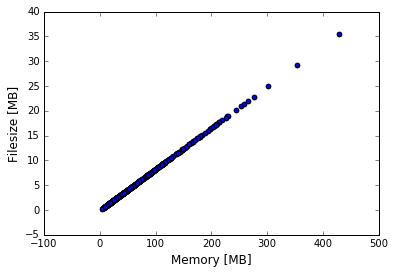

In [6]:
fig1 = plt.figure(1)
plt.xlabel('Memory [MB]', fontsize=12)
plt.ylabel('Filesize [MB]', fontsize=12)
plt.scatter(memory, filesize)
fig1.savefig('memory_filesize.jpg')
plt.show()

The memory consumption is proportional to the filesize. It comes from the fact that the whole tree corresponding to the XML file is stored in the memory.

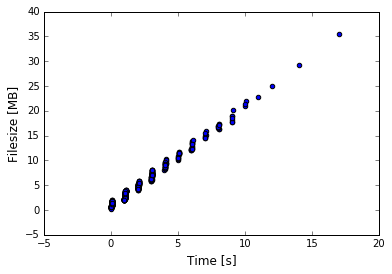

In [7]:
fig2 = plt.figure(2)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Filesize [MB]', fontsize=12)
plt.scatter(time, filesize)
fig2.savefig('time_filesize.jpg')
plt.show()

The time is proportional to the size of the file because the validation is linear in the size of the parse tree.

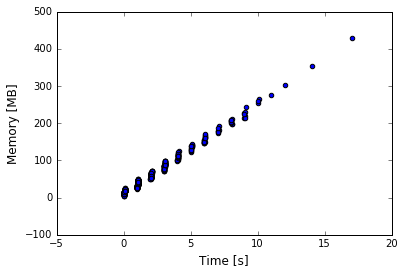

In [8]:
fig3 = plt.figure(3)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Memory [MB]', fontsize=12)
plt.scatter(time, memory)
fig3.savefig('time_memory.jpg')
plt.show()

The last plot shows the relation between the time and memory used. Those runs that took more time, took more space. It's a conclusion of the two previous plots.